In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, concatenate , Average , Activation , BatchNormalization , Add 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

# **Read The Data and Labels**

In [2]:
train_path=r"D:\mazen FCDS\FCDS\Neural Networks\project_2\Data\train"
test_path=r"D:\mazen FCDS\FCDS\Neural Networks\project_2\Data\test"

In [3]:
#copy from the training labels
train_labels = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
                'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
                'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
                'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
                'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
                'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
                'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
                'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
                'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
                'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
                'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

# **Show Some Random Pictures**

In [4]:
#count how many pictures in each class
dic={}
for folder in os.listdir(train_path): #open train_path and read each folder name [0,1,2,...,103]
    path=train_path+"/"+folder # add the folder name to train_path 
    counter=0 #will act as a label for the images
    for img in os.listdir(path):# open the each folder in the training path and read the image's address
        counter+=1
    dic[train_labels[int(folder)]]=counter
dic    

{'pink primrose': 272,
 'hard-leaved pocket orchid': 26,
 'snapdragon': 136,
 'trumpet creeper': 31,
 'blackberry lily': 25,
 'common tulip': 390,
 'wild rose': 743,
 "colt's foot": 43,
 'king protea': 92,
 'spear thistle': 263,
 'yellow iris': 227,
 'globe-flower': 21,
 'purple coneflower': 55,
 'peruvian lily': 50,
 'balloon flower': 90,
 'giant white arum lily': 26,
 'canterbury bells': 20,
 'fire lily': 19,
 'pincushion flower': 96,
 'fritillary': 48,
 'red ginger': 19,
 'grape hyacinth': 85,
 'corn poppy': 83,
 'prince of wales feathers': 21,
 'stemless gentian': 34,
 'artichoke': 119,
 'sweet william': 109,
 'sweet pea': 21,
 'carnation': 105,
 'garden phlox': 24,
 'love in the mist': 23,
 'cosmos': 20,
 'alpine sea holly': 18,
 'ruby-lipped cattleya': 36,
 'cape flower': 57,
 'great masterwort': 26,
 'siam tulip': 19,
 'lenten rose': 73,
 'wild geranium': 703,
 'barberton daisy': 64,
 'daffodil': 96,
 'sword lily': 63,
 'poinsettia': 110,
 'bolero deep blue': 18,
 'wallflower': 

In [5]:
#add data augmentaion to the training data since the data is too small
trainset=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, # normalize data
    zoom_range=0.2, # randomly zoom images by up to 20%
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=True, # randomly flip images vertically
    rotation_range=30, # randomly rotate images by up to 30 degrees
    width_shift_range=0.2, # randomly shift images horizontally by up to 20%
    height_shift_range=0.2, # randomly shift images vertically by up to 20%
    brightness_range=(0.5, 1.5), # randomly adjust brightness between 50% and 150%
    fill_mode='reflect', # fill in missing pixels with reflections of existing pixels
    validation_split=0.1# validation is 10% from the total train folder
)

In [6]:
#add data augmentaion to the test data since the data is too small
testset=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 #normalization
)

In [7]:
#get the data from the training directory and determine the pictures characteristics 
#set the training percentage to be 90% of the data 
train=trainset.flow_from_directory(
    directory=train_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="training",
)

Found 11524 images belonging to 104 classes.


In [8]:
#get the data from the training directory and determine the pictures characteristics 
#set the validation data percentage to be 10% of the data 
valid=trainset.flow_from_directory(
    directory=train_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="validation"
)

Found 1229 images belonging to 104 classes.


In [9]:
#get the data from the test directory and determine the pictures characteristics 
test=testset.flow_from_directory(
    directory=test_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 3712 images belonging to 104 classes.


In [10]:
t_img,tclass=next(test) #separate the img from their classes

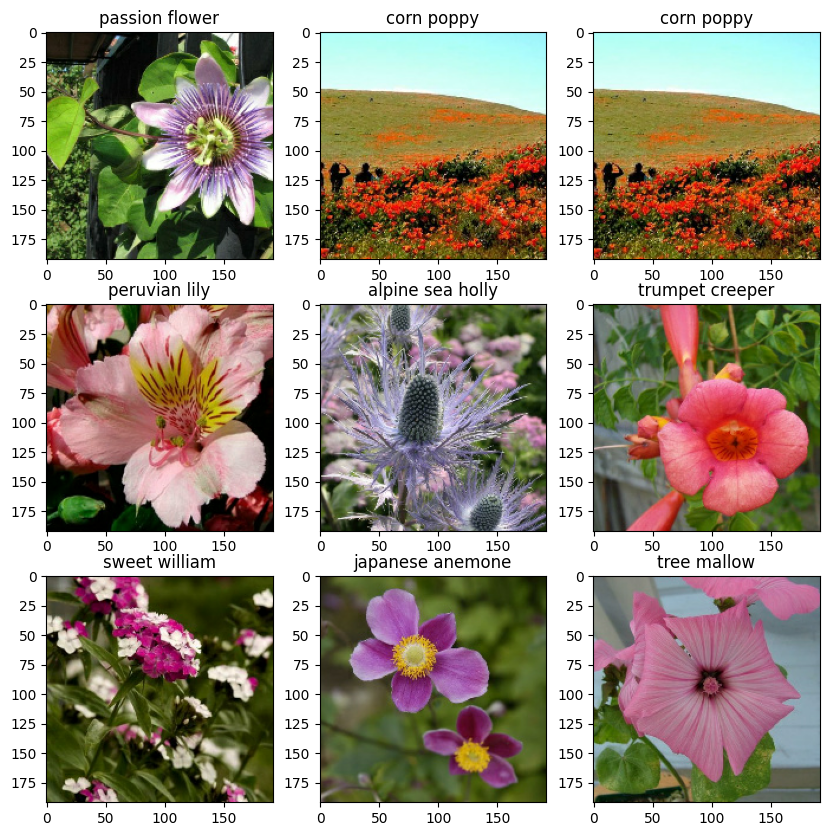

In [9]:
#pic 9 random flowers and print them
#pic the first picture from a random folder in the training dataset
plt.figure(figsize=(10, 10))
folder=train_path
for i in range(9):
    rd=random.choice(os.listdir(train_path)) # choose a random picture from the training path
    path=folder+"/"+rd
    ax = plt.subplot(3, 3,i + 1)
    for j in os.listdir(path):
        imgg=plt.imread(path+"/"+j)
        plt.imshow(imgg)
        plt.title(train_labels[int(rd)])
        continue

# **f1-score function**

In [11]:
def f1(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

# **Define confusion_matrix as a function to plot it**

In [12]:
def plotConfMat(predicted_label):
  cm = confusion_matrix(test.labels, predicted_label)
  fig = plt.figure(figsize = (20,20))
  ax1 = fig.add_subplot(1,1,1)
  sns.set(font_scale=1.4) #for label size
  sns.heatmap(cm, annot=True, annot_kws={"size": 12},
       cbar = False, cmap='Purples');
  ax1.set_ylabel('True Values',fontsize=14)
  ax1.set_xlabel('Predicted Values',fontsize=14)
  plt.show()

# **1) Simple Model**

In [12]:
#try new models 
simple_model = Sequential()
simple_model.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
simple_model.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
simple_model.add(MaxPooling2D())
simple_model.add(layers.BatchNormalization())

simple_model.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
simple_model.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
simple_model.add(MaxPooling2D())
simple_model.add(layers.BatchNormalization())

simple_model.add(Flatten())
simple_model.add(Dense(128,activation='relu'))
simple_model.add(Dense(128,activation='relu'))
simple_model.add(Dropout(0.5))
simple_model.add(Dense(104,activation='softmax'))

In [13]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        9

In [14]:
#lr = 1e-5
simple_model.compile(optimizer=Adam(0.00001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [17]:
simple_model.load_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_simple_model.h5")

In [18]:
simple_model_history = simple_model.fit(train,batch_size=32,epochs=25,validation_data=valid)

Epoch 1/25
361/361 [==============================] - 524s 1s/step - loss: 4.0536 - accuracy: 0.1760 - val_loss: 3.8225 - val_accuracy: 0.2132
Epoch 2/25
361/361 [==============================] - 388s 1s/step - loss: 4.0405 - accuracy: 0.1843 - val_loss: 3.7965 - val_accuracy: 0.2124
Epoch 3/25
361/361 [==============================] - 379s 1s/step - loss: 4.0388 - accuracy: 0.1823 - val_loss: 3.7957 - val_accuracy: 0.2213
Epoch 4/25
361/361 [==============================] - 379s 1s/step - loss: 4.0384 - accuracy: 0.1793 - val_loss: 3.7541 - val_accuracy: 0.2400
Epoch 5/25
361/361 [==============================] - 390s 1s/step - loss: 4.0466 - accuracy: 0.1781 - val_loss: 3.7375 - val_accuracy: 0.2311
Epoch 6/25
361/361 [==============================] - 379s 1s/step - loss: 4.0235 - accuracy: 0.1830 - val_loss: 3.7395 - val_accuracy: 0.2295
Epoch 7/25
361/361 [==============================] - 379s 1s/step - loss: 4.0049 - accuracy: 0.1859 - val_loss: 3.7759 - val_accuracy: 0.2311

In [21]:
simple_model.save_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_simple_model.h5")

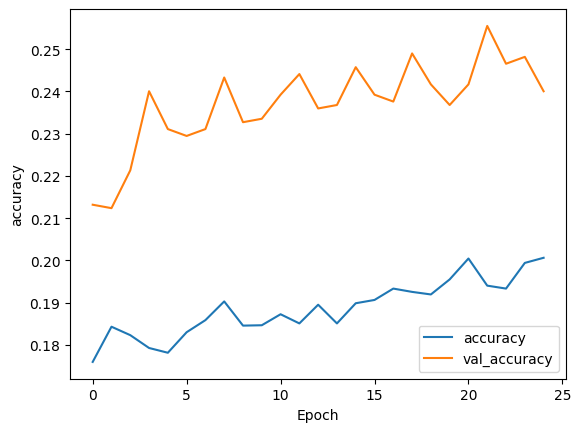

In [20]:
plt.plot(simple_model_history.history['accuracy'], label='accuracy')
plt.plot(simple_model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

In [13]:
modified_model = Sequential()
modified_model.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01),input_shape = (192,192,3)))
modified_model.add(Conv2D(16,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
modified_model.add(MaxPooling2D())

modified_model.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
modified_model.add(Conv2D(32,3,padding = 'same',kernel_regularizer=regularizers.l2(0.01)))
modified_model.add(MaxPooling2D())

modified_model.add(Flatten())
modified_model.add(Dense(120,activation='relu'))
modified_model.add(Dense(64,activation='relu'))
modified_model.add(Dropout(0.5))
modified_model.add(Dense(104,activation='softmax'))

In [14]:
modified_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 192, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                    

In [15]:
modified_model.compile(optimizer=Adam(0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [16]:
modified_model.load_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_modified_model.h5")

In [18]:
modified_model_history = modified_model.fit(train,batch_size=32,epochs=25,validation_data=valid)

Epoch 1/25
361/361 [==============================] - 485s 1s/step - loss: 3.1724 - accuracy: 0.2280 - val_loss: 2.9819 - val_accuracy: 0.2653
Epoch 2/25
361/361 [==============================] - 339s 939ms/step - loss: 3.1761 - accuracy: 0.2257 - val_loss: 2.9610 - val_accuracy: 0.2596
Epoch 3/25
361/361 [==============================] - 340s 940ms/step - loss: 3.1558 - accuracy: 0.2319 - val_loss: 2.9430 - val_accuracy: 0.2669
Epoch 4/25
361/361 [==============================] - 339s 938ms/step - loss: 3.1342 - accuracy: 0.2334 - val_loss: 2.9179 - val_accuracy: 0.2799
Epoch 5/25
361/361 [==============================] - 340s 941ms/step - loss: 3.1363 - accuracy: 0.2337 - val_loss: 2.9072 - val_accuracy: 0.2823
Epoch 6/25
361/361 [==============================] - 339s 938ms/step - loss: 3.1173 - accuracy: 0.2382 - val_loss: 2.8805 - val_accuracy: 0.2791
Epoch 7/25
361/361 [==============================] - 340s 940ms/step - loss: 3.1014 - accuracy: 0.2379 - val_loss: 2.8979 - va

In [21]:
modified_model.save_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_modified_model.h5")

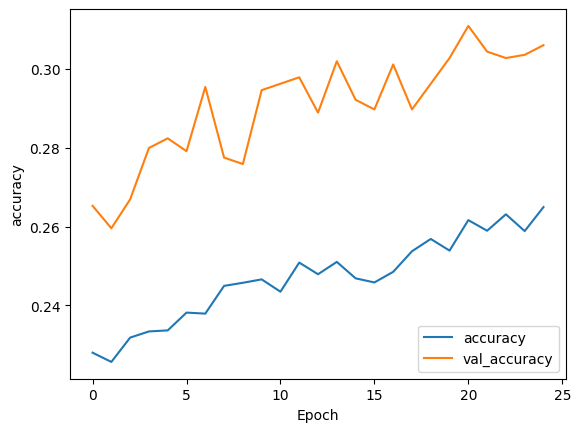

In [22]:
plt.plot(modified_model_history.history['accuracy'], label='accuracy')
plt.plot(modified_model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

# **Scratched Model**

In [15]:
#model 1
model = Sequential([
  layers.Conv2D(16, 3, activation='relu',input_shape=(192,192,3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(104,activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 190, 190, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 188, 188, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 94, 94, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 135424)           

In [17]:
#compile model
model.compile(optimizer=Adam(0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [21]:
#load saved model data
model.load_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_model.h5")

In [28]:
#train the model
history = model.fit(train,epochs=100,batch_size=64,validation_data=valid)

Epoch 1/100
361/361 [==============================] - 455s 1s/step - loss: 1.7235 - accuracy: 0.5025 - val_loss: 2.0365 - val_accuracy: 0.4695
Epoch 2/100
361/361 [==============================] - 432s 1s/step - loss: 1.7242 - accuracy: 0.5095 - val_loss: 2.0616 - val_accuracy: 0.4638
Epoch 3/100
361/361 [==============================] - 429s 1s/step - loss: 1.6876 - accuracy: 0.5110 - val_loss: 2.1221 - val_accuracy: 0.4508
Epoch 4/100
361/361 [==============================] - 429s 1s/step - loss: 1.7301 - accuracy: 0.5041 - val_loss: 2.1280 - val_accuracy: 0.4605
Epoch 5/100
361/361 [==============================] - 429s 1s/step - loss: 1.7031 - accuracy: 0.5105 - val_loss: 2.0753 - val_accuracy: 0.4670
Epoch 6/100
361/361 [==============================] - 430s 1s/step - loss: 1.6776 - accuracy: 0.5201 - val_loss: 2.0483 - val_accuracy: 0.4695
Epoch 7/100
361/361 [==============================] - 431s 1s/step - loss: 1.6624 - accuracy: 0.5212 - val_loss: 2.0220 - val_accuracy:

In [29]:
#save the trained weights
model.save_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_model.h5")

In [ ]:
#download the model
model.save(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\model")

INFO:tensorflow:Assets written to: D:\mazen FCDS\FCDS\Neural Networks\project_2\model_0\assets


INFO:tensorflow:Assets written to: D:\mazen FCDS\FCDS\Neural Networks\project_2\model_0\assets


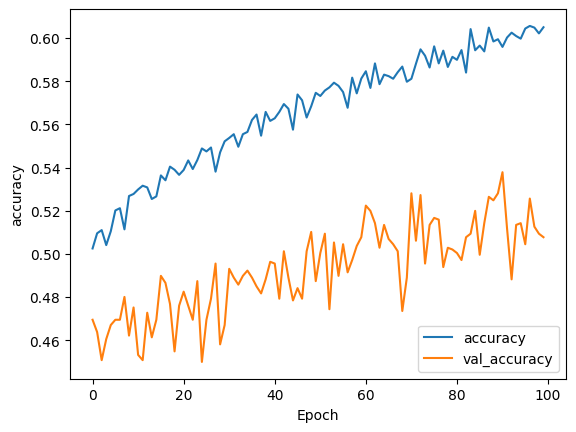

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

# **3) ResNet Model**

In [15]:
def resnet_block(input_data, filters, strides):
    # Create shortcut connection
    shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(input_data)
    shortcut = BatchNormalization()(shortcut)
    
    # Main path
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Merge shortcut and main path
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    
    return x

In [20]:
def resnet():
    # input layer 
    input_data = Input(shape=(192, 192, 3))

    # First convolutional block
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    
    # ResNet blocks
    x = resnet_block(x, filters=64, strides=(1, 1))
    x = resnet_block(x, filters=64, strides=(1, 1))
    x = resnet_block(x, filters=128, strides=(2, 2))
    x = resnet_block(x, filters=128, strides=(1, 1))
    x = resnet_block(x, filters=256, strides=(2, 2))
    x = resnet_block(x, filters=256, strides=(1, 1))
    x = resnet_block(x, filters=512, strides=(2, 2))
    x = resnet_block(x, filters=512, strides=(1, 1))
    
    # Global average pooling and output layer
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(104, activation='softmax')(x)
    
    # Define and return the model
    model = Model(inputs=input_data, outputs=outputs)
    return model

In [21]:
resnet = resnet()
resnet.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics="accuracy")

In [22]:
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 96, 96, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_25 (BatchN  (None, 96, 96, 64)  256         ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [23]:
resnet.load_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_resnet_model.h5")

In [25]:
resnet_hist = resnet.fit(train,epochs=10,batch_size=32,validation_data=valid)

Epoch 1/10
361/361 [==============================] - 1142s 3s/step - loss: 0.3634 - accuracy: 0.8878 - val_loss: 0.8515 - val_accuracy: 0.7705
Epoch 2/10
361/361 [==============================] - 1086s 3s/step - loss: 0.3178 - accuracy: 0.9035 - val_loss: 0.8859 - val_accuracy: 0.7730
Epoch 3/10
361/361 [==============================] - 1097s 3s/step - loss: 0.3002 - accuracy: 0.9072 - val_loss: 0.8398 - val_accuracy: 0.7852
Epoch 4/10
361/361 [==============================] - 1143s 3s/step - loss: 0.2910 - accuracy: 0.9121 - val_loss: 0.8660 - val_accuracy: 0.7844
Epoch 5/10
361/361 [==============================] - 1064s 3s/step - loss: 0.2821 - accuracy: 0.9128 - val_loss: 0.8463 - val_accuracy: 0.7681
Epoch 6/10
361/361 [==============================] - 1036s 3s/step - loss: 0.2721 - accuracy: 0.9164 - val_loss: 0.8908 - val_accuracy: 0.7567
Epoch 7/10
361/361 [==============================] - 1058s 3s/step - loss: 0.2563 - accuracy: 0.9222 - val_loss: 0.8651 - val_accuracy:

In [26]:
resnet.save_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_resnet_model.h5")

In [27]:
resnet.save(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\resnet_model")

INFO:tensorflow:Assets written to: D:\mazen FCDS\FCDS\Neural Networks\project_2\resnet_model\assets


INFO:tensorflow:Assets written to: D:\mazen FCDS\FCDS\Neural Networks\project_2\resnet_model\assets


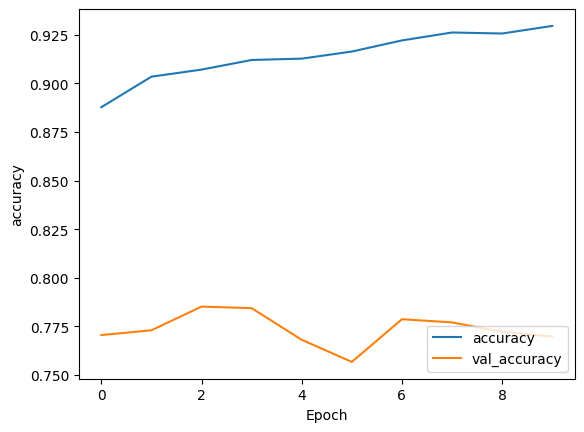

In [28]:
plt.plot(resnet_hist.history['accuracy'], label='accuracy')
plt.plot(resnet_hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

In [29]:
y_pred_res = resnet.predict(test, batch_size=32)

116/116 [==============================] - 99s 851ms/step


In [40]:
classes_1 = np.argmax(y_pred_res,axis=1)

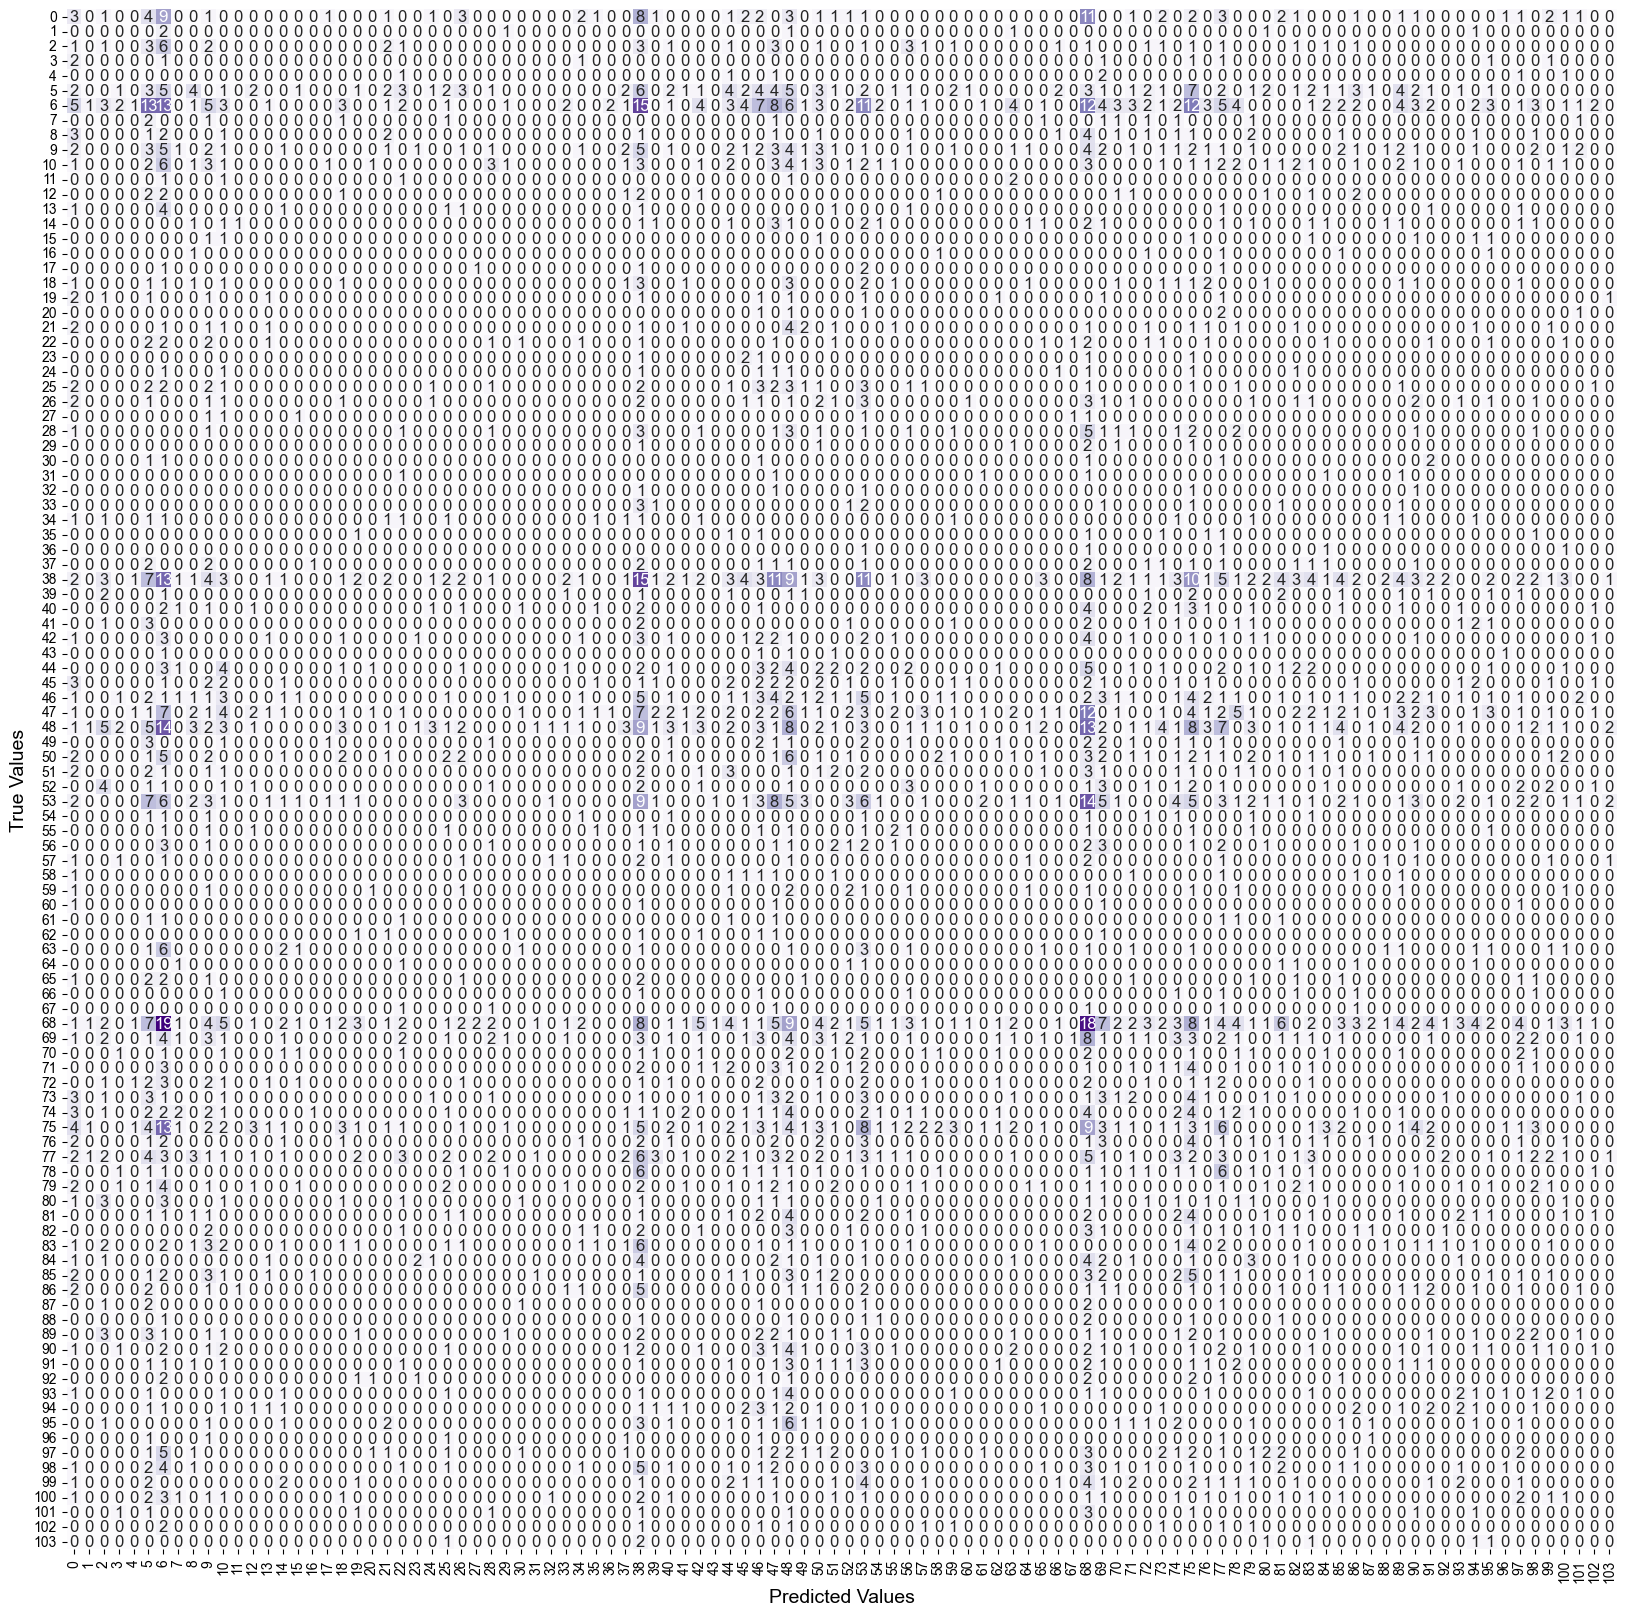

In [32]:
plotConfMat(classes_1)

In [42]:
f=f1(test.labels,classes_1)
print(f'f-score {f}')

f-score 0.9787994623184204


# **3) Google-Net Model**

In [25]:
#google-net
#input_layer_inception
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 

    path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)
    path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)
    path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
    path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)
    output_layer = concatenate([path1, path2, path3, path4], axis = -1)

    return output_layer

In [28]:
def GoogLeNet():
    # input layer 
    input_layer = Input(shape = (192, 192, 3))

    # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

    # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 1st Inception block
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

    # 2nd Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 3rd Inception block
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

    # Extra network 1:
    X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
    X1 = Flatten()(X1)
    X1 = Dense(1024, activation = 'relu')(X1)
    X1 = Dropout(0.7)(X1)
    X1 = Dense(104, activation = 'softmax')(X1)


    # 4th Inception block
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 5th Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 6th Inception block
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

    # Extra network 2:
    X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
    X2 = Flatten()(X2)
    X2 = Dense(1024, activation = 'relu')(X2)
    X2 = Dropout(0.7)(X2)
    X2 = Dense(104, activation = 'softmax')(X2)


    # 7th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # 8th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

    # 9th Inception block
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

    # Global Average pooling layer 
    X = GlobalAveragePooling2D(name = 'GAPL')(X)

    # Dropoutlayer 
    X = Dropout(0.4)(X)

    # output layer 
    X = Dense(104, activation = 'softmax')(X)

    # model
    model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

    return model 

In [29]:
#define model and compile it
gn = GoogLeNet()
gn.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics="accuracy")

In [30]:
gn.load_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_GoogleNet_model.h5")

In [151]:
gn_history = gn.fit(train,epochs=25,batch_size=32,validation_data=valid)

Epoch 1/25
361/361 [==============================] - 677s 2s/step - loss: 3.1793 - dense_58_loss: 0.7287 - dense_55_loss: 1.4109 - dense_57_loss: 1.0397 - dense_58_accuracy: 0.7644 - dense_55_accuracy: 0.5930 - dense_57_accuracy: 0.6932 - val_loss: 5.3557 - val_dense_58_loss: 1.8797 - val_dense_55_loss: 1.6859 - val_dense_57_loss: 1.7901 - val_dense_58_accuracy: 0.5688 - val_dense_55_accuracy: 0.5663 - val_dense_57_accuracy: 0.5639
Epoch 2/25
361/361 [==============================] - 737s 2s/step - loss: 3.1094 - dense_58_loss: 0.6994 - dense_55_loss: 1.4001 - dense_57_loss: 1.0099 - dense_58_accuracy: 0.7762 - dense_55_accuracy: 0.5988 - dense_57_accuracy: 0.6984 - val_loss: 5.2513 - val_dense_58_loss: 1.8637 - val_dense_55_loss: 1.6644 - val_dense_57_loss: 1.7232 - val_dense_58_accuracy: 0.5720 - val_dense_55_accuracy: 0.5492 - val_dense_57_accuracy: 0.5720
Epoch 3/25
361/361 [==============================] - 600s 2s/step - loss: 3.1110 - dense_58_loss: 0.6996 - dense_55_loss: 1.4

In [157]:
gn.save_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_GoogleNet_model.h5")

In [158]:
gn.save(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\GoogleNet_model")

INFO:tensorflow:Assets written to: D:\mazen FCDS\FCDS\Neural Networks\project_2\GoogleNet_model\assets


INFO:tensorflow:Assets written to: D:\mazen FCDS\FCDS\Neural Networks\project_2\GoogleNet_model\assets


In [160]:
y_pred_gn = gn.predict(test, batch_size=32)

116/116 [==============================] - 43s 373ms/step


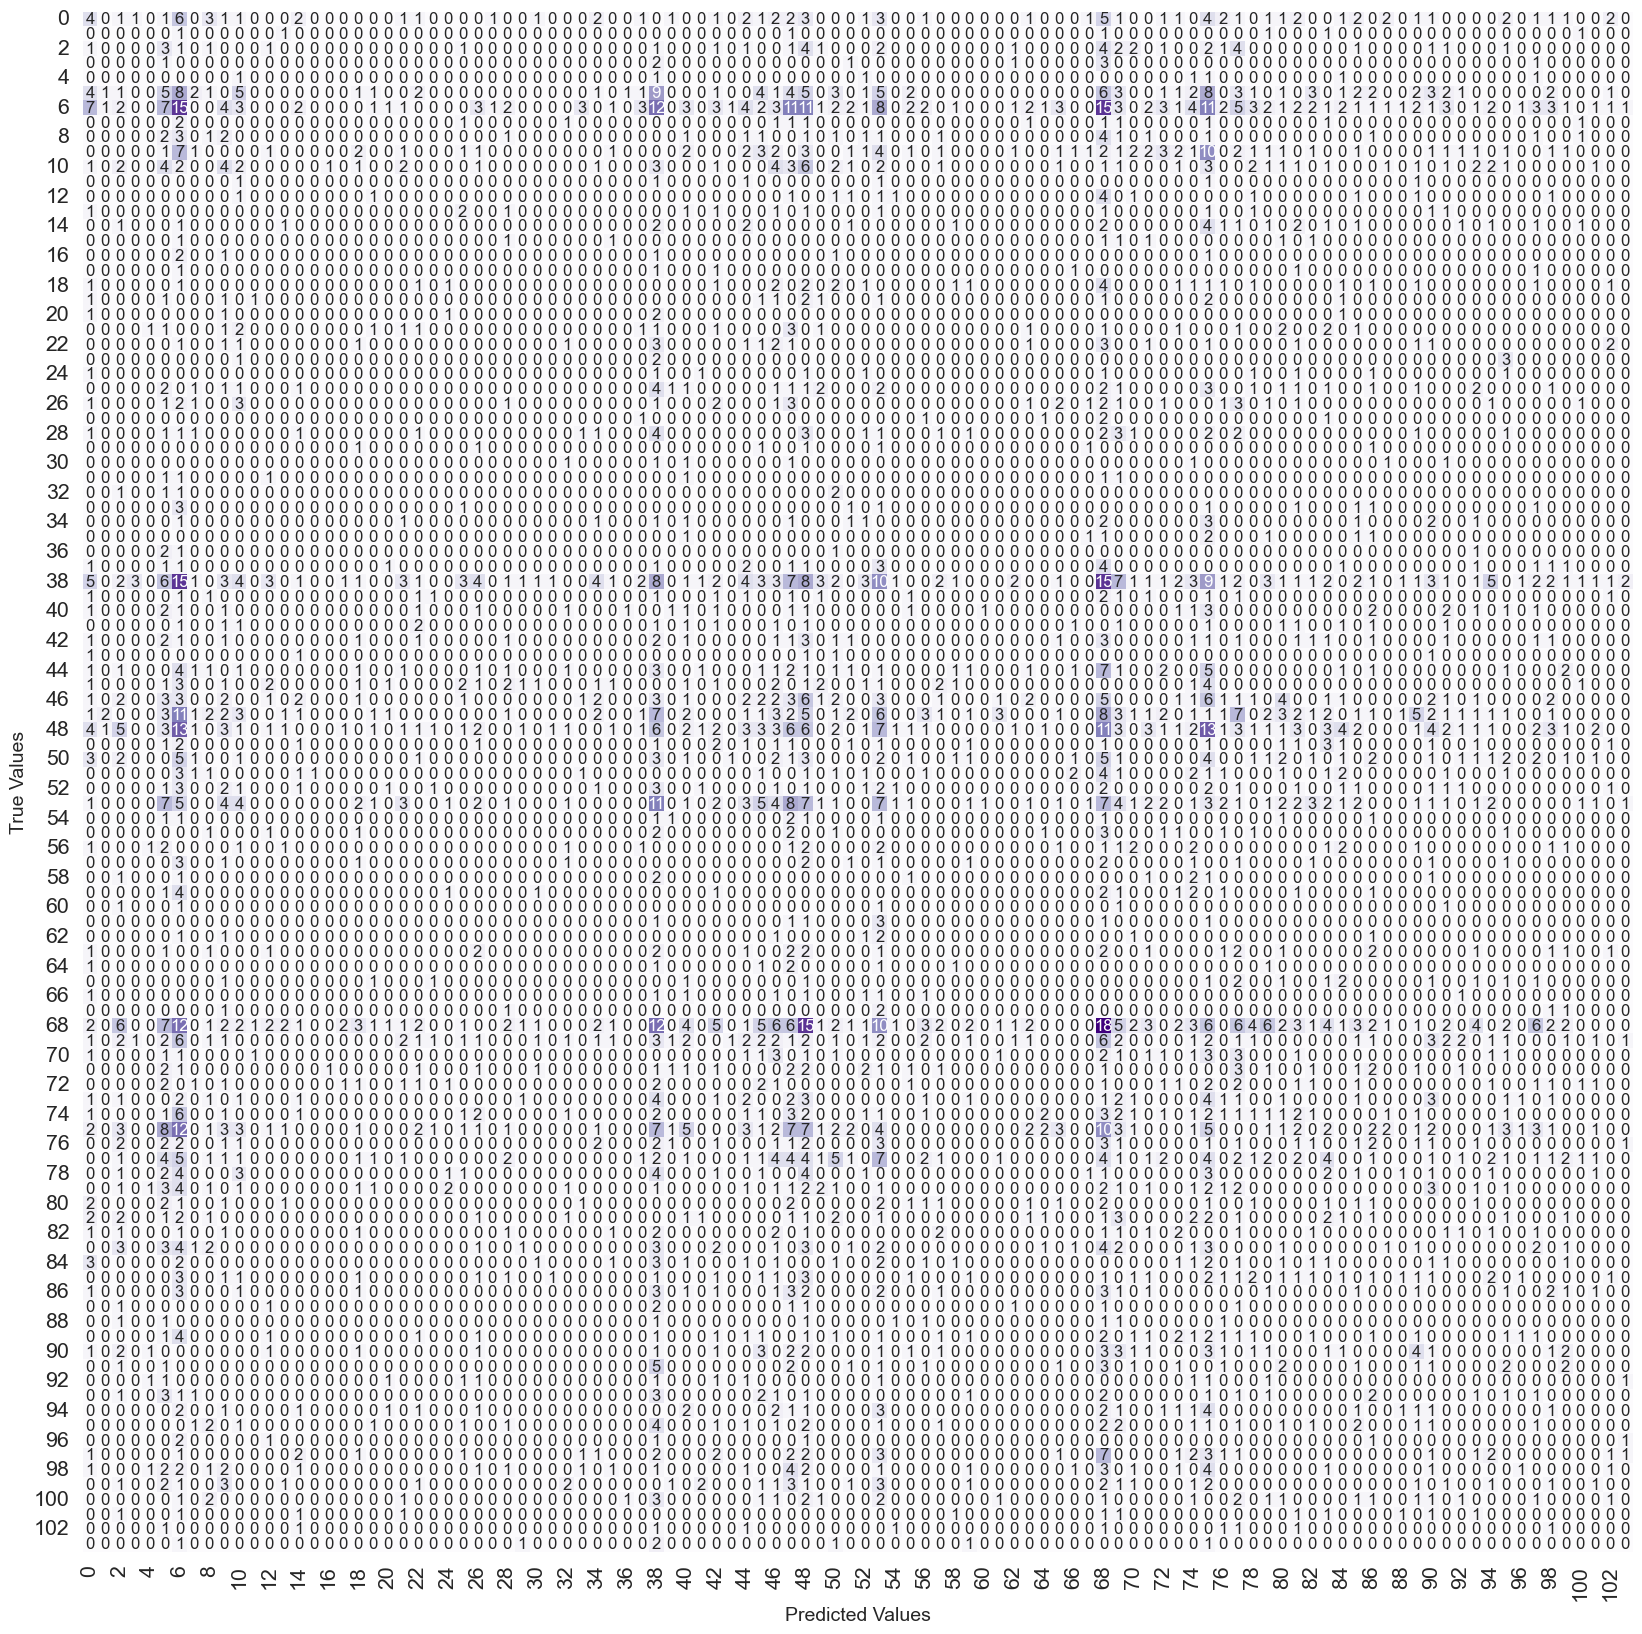

In [165]:
#In google net we have 3 outputs so we will choose finally output layer 
classes_2 = np.argmax(y_pred_gn[0],axis=1)
plotConfMat(classes_2)

In [164]:
f=f1(test.labels,classes_2)
print(f'f-score {f}')

f-score 0.9806185364723206


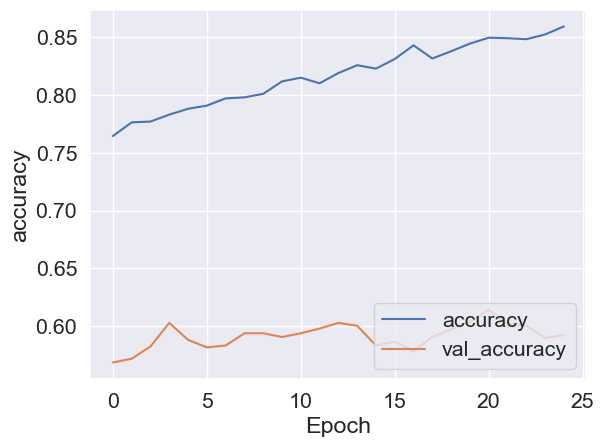

In [172]:
plt.plot(gn_history.history['dense_58_accuracy'], label='accuracy')
plt.plot(gn_history.history['val_dense_58_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

# **4)Transfer Learning**

In [32]:
#transfer
#not including top (not including the dense layer at the top of the model)
trans_model = tf.keras.applications.Xception(weights='imagenet',input_shape=(192,192, 3),include_top=False)

#freeze all the weights from the transfered model (no need to train them)
trans_model.trainable = False

In [33]:
# make a model as output for the trasfered model
inputs = tf.keras.Input(shape=(192, 192, 3))
x = trans_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(104,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [34]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics='accuracy')

In [35]:
model.load_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_transfer_model.h5")

In [15]:
trans_history=model.fit(train, epochs=15,batch_size=32, validation_data=valid)

Epoch 1/15
361/361 [==============================] - 567s 2s/step - loss: 0.9072 - accuracy: 0.7573 - val_loss: 1.1590 - val_accuracy: 0.6876
Epoch 2/15
361/361 [==============================] - 497s 1s/step - loss: 0.9144 - accuracy: 0.7591 - val_loss: 1.1720 - val_accuracy: 0.7046
Epoch 3/15
361/361 [==============================] - 495s 1s/step - loss: 0.8993 - accuracy: 0.7613 - val_loss: 1.1803 - val_accuracy: 0.6916
Epoch 4/15
361/361 [==============================] - 496s 1s/step - loss: 0.9120 - accuracy: 0.7518 - val_loss: 1.1390 - val_accuracy: 0.7063
Epoch 5/15
361/361 [==============================] - 498s 1s/step - loss: 0.9031 - accuracy: 0.7608 - val_loss: 1.1777 - val_accuracy: 0.6924
Epoch 6/15
361/361 [==============================] - 497s 1s/step - loss: 0.8915 - accuracy: 0.7622 - val_loss: 1.1444 - val_accuracy: 0.7038
Epoch 7/15
361/361 [==============================] - 498s 1s/step - loss: 0.8924 - accuracy: 0.7635 - val_loss: 1.2053 - val_accuracy: 0.6884

In [18]:
model.save_weights(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\weights_transfer_model.h5")

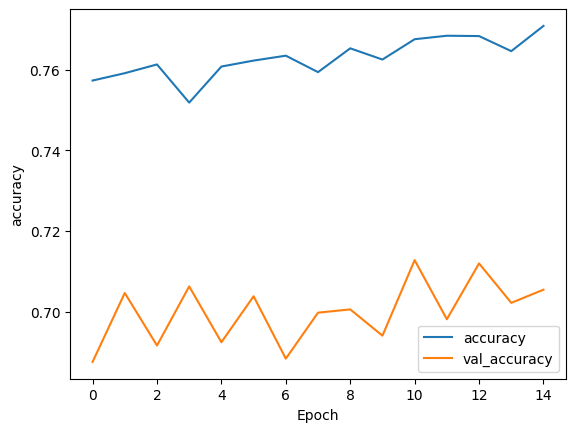

In [19]:
plt.plot(trans_history.history['accuracy'], label='accuracy')
plt.plot(trans_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');


In [36]:
y_pred_trans = model.predict(test, batch_size=32)

116/116 [==============================] - 179s 2s/step


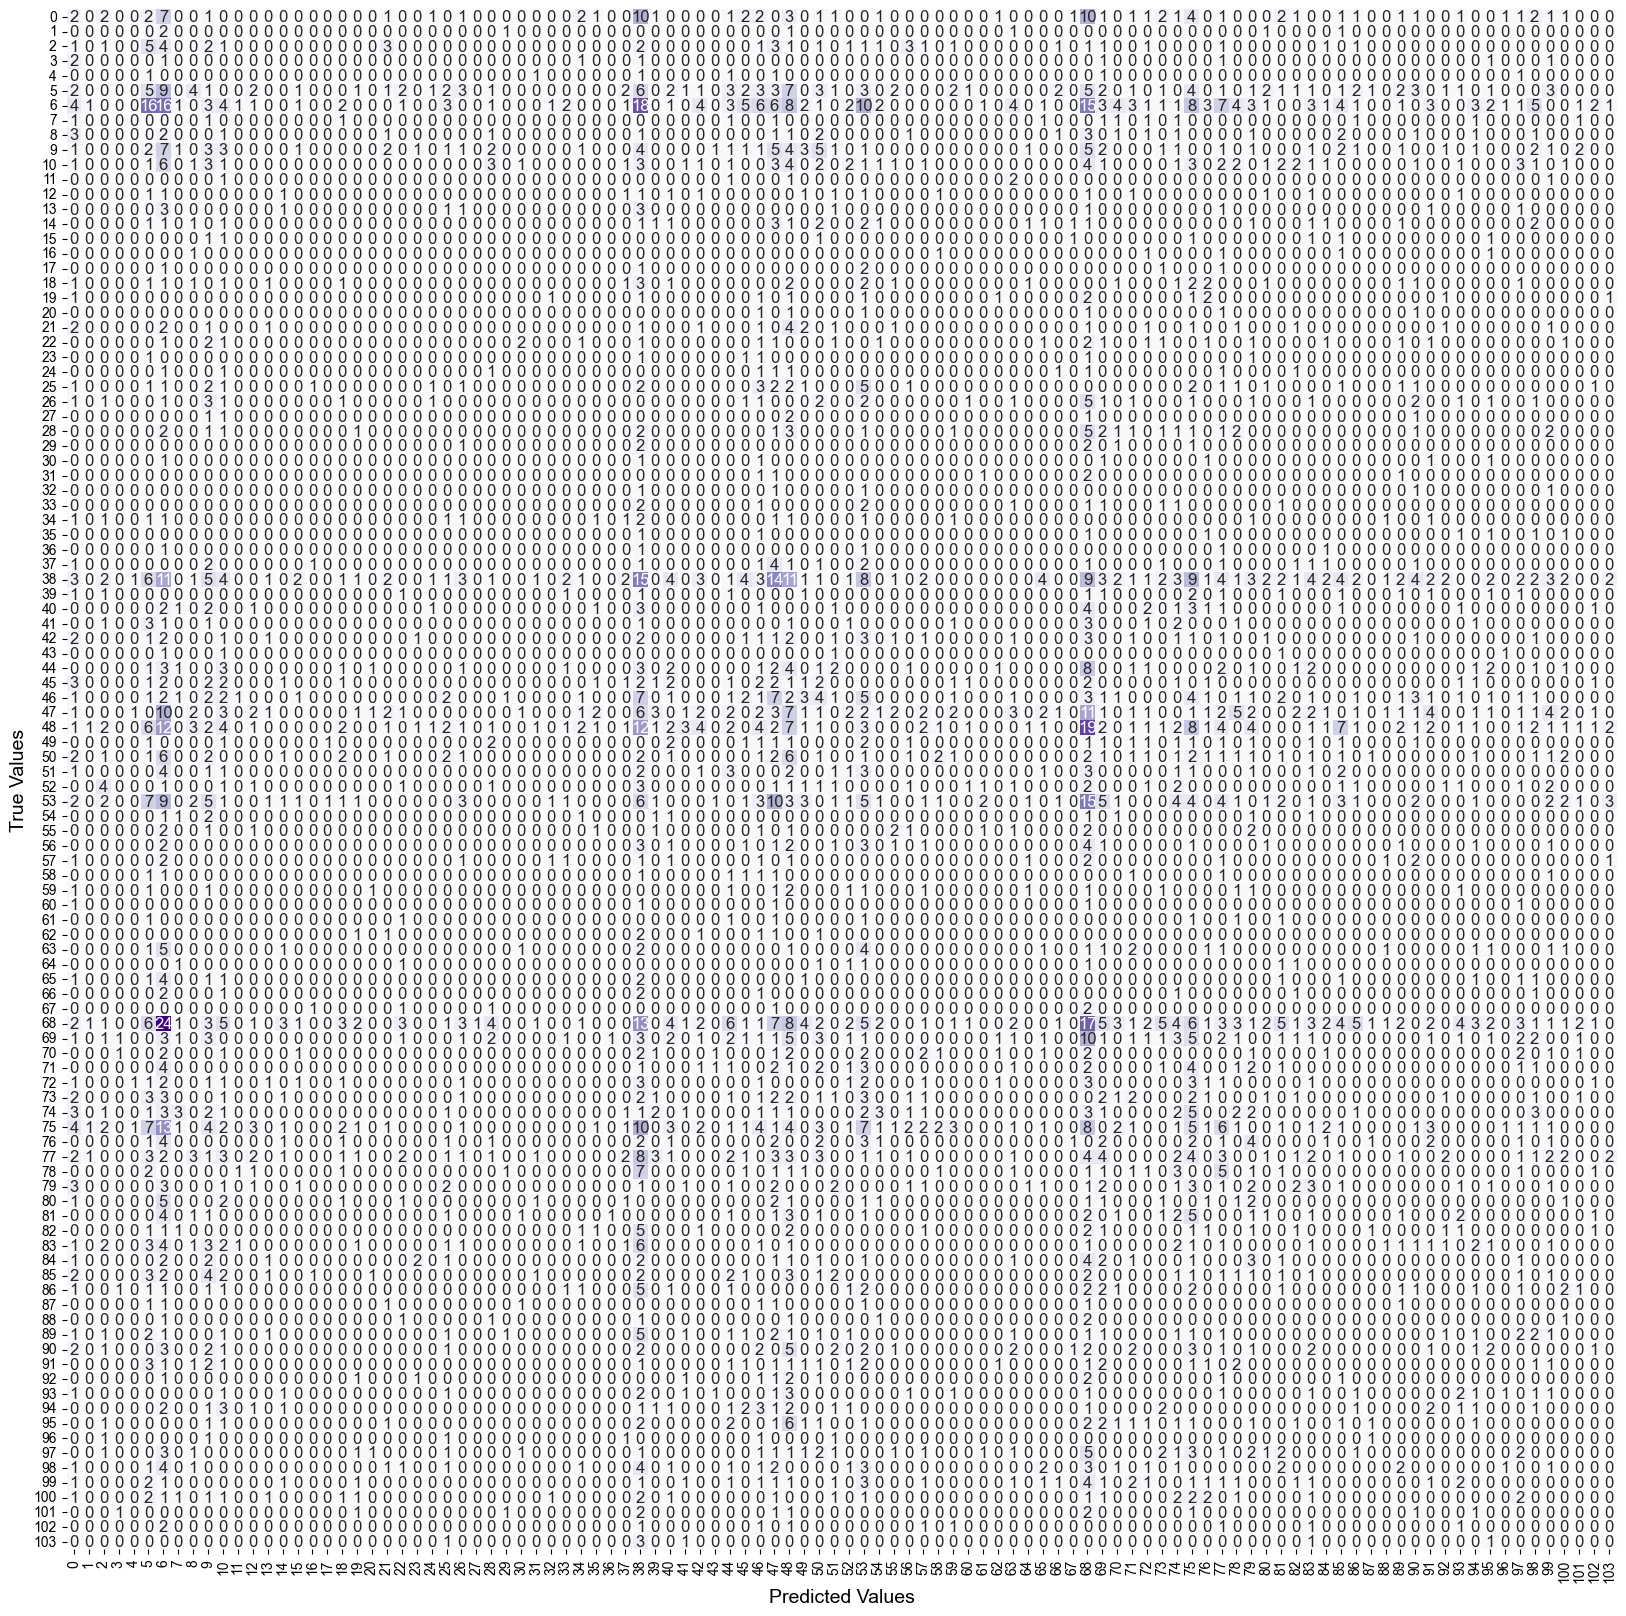

In [22]:
classes_3 = np.argmax(y_pred_trans,axis=1)
plotConfMat(classes_3)

In [39]:
f=f1(test.labels,classes_3)
print(f'f-score {f}')

f-score 0.9785360097885132


# **5) Ensemble**

In [13]:
# Load pre-trained GoogleNet and VGG models
googlenet_model = tf.keras.models.load_model(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\GoogleNet_model")
model_0 = tf.keras.models.load_model(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\model")
resent_model = tf.keras.models.load_model(r"D:\mazen FCDS\FCDS\Neural Networks\project_2\resnet_model")

In [14]:
#input
model_input = tf.keras.Input(shape=(192, 192, 3))
#outputs of 2 models
resnet_output = resent_model(model_input)
googlenet_output = googlenet_model(model_input)
model_0 = model_0(model_input)

#Combine the outputs using averaging
ensemble_output = tf.keras.layers.Average()([resnet_output, googlenet_output[1]])

#Create the ensemble model
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [15]:
ensemble_model.compile(optimizer=Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [16]:
y_pred_ens = ensemble_model.predict(test, batch_size=32)

116/116 [==============================] - 88s 749ms/step


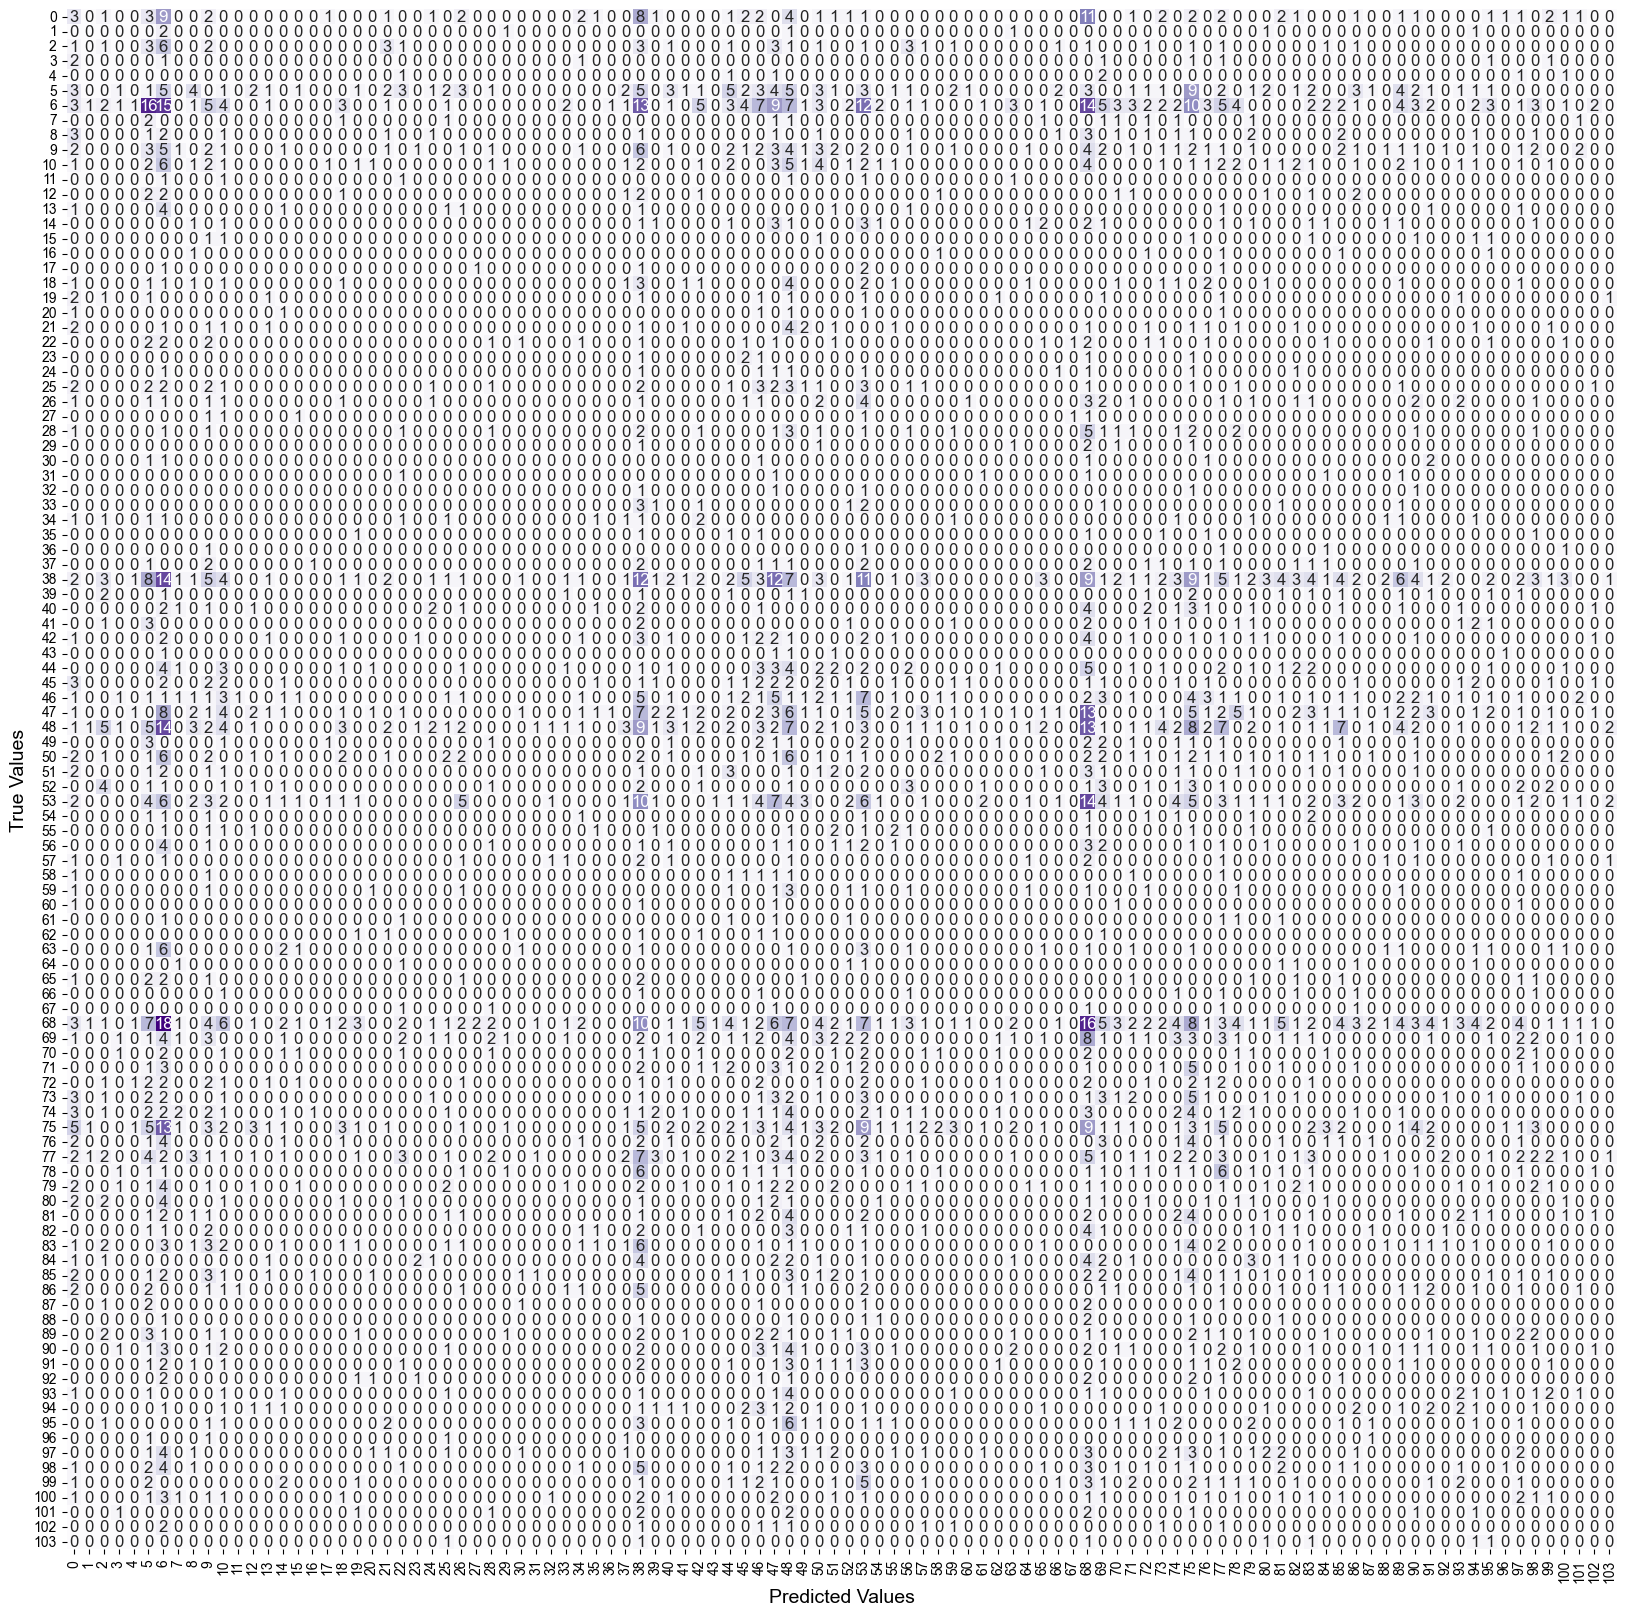

In [17]:
classes_4 = np.argmax(y_pred_ens,axis=1)
plotConfMat(classes_4)

In [18]:
f=f1(test.labels,classes_4)
print(f'f-score {f}')

f-score 0.9785183072090149


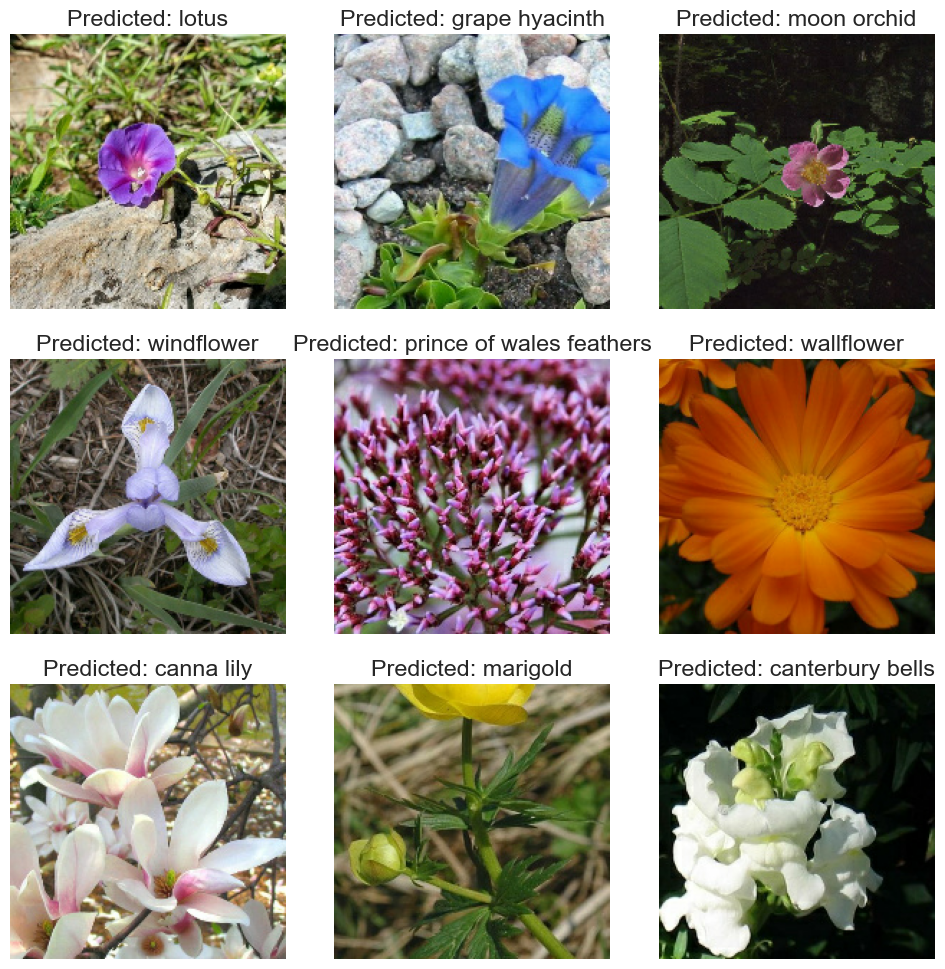

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(t_img[i])
    y = np.array(y_pred_ens[i])
    predicted_label = train_labels[np.argmax(y)]
    plt.title("Predicted: {}".format(predicted_label))
    plt.axis("off")
plt.tight_layout()
plt.show()